In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
n_customers=500
data={
    'ID':range(1,n_customers+1),
    'Recency':np.random.randint(1,365,size=n_customers), #Days since last purchase
    'Frequency':np.random.randint(1,50,size=n_customers), #number of purchase
    'Monetary':np.random.uniform(10,500,size=n_customers) #Total Spending
}

In [3]:
df=pd.DataFrame(data)

In [4]:
df

,ID,Recency,Frequency,Monetary
0,1,173,7,205.588961
1,2,48,34,221.562463
2,3,118,45,311.118573
3,4,193,46,44.320673
4,5,324,42,412.979302
...,...,...,...,...
495,496,97,18,18.867216
496,497,340,38,299.386836
497,498,283,26,223.410455
498,499,207,22,401.357732


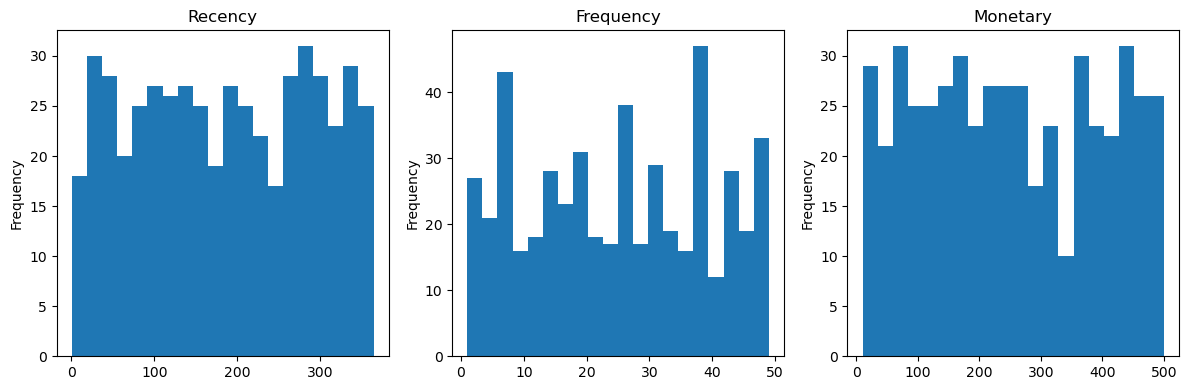

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(131)
df['Recency'].plot(kind='hist',bins=20,title='Recency')
plt.subplot(132)
df['Frequency'].plot(kind='hist',bins=20,title='Frequency')
plt.subplot(133)
df['Monetary'].plot(kind='hist',bins=20,title='Monetary')
plt.tight_layout()
plt.show()

In [6]:
df['Recencys']=pd.qcut(df['Recency'],q=4,labels=False) #qcut--->quantile and prefered plot is scatter plot
df['Frequencys']=pd.qcut(df['Frequency'],q=4,labels=False)
df['Monetarys']=pd.qcut(df['Monetary'],q=4,labels=False)
df['RFM']=df['Recencys']+df['Frequencys']+df['Monetarys']

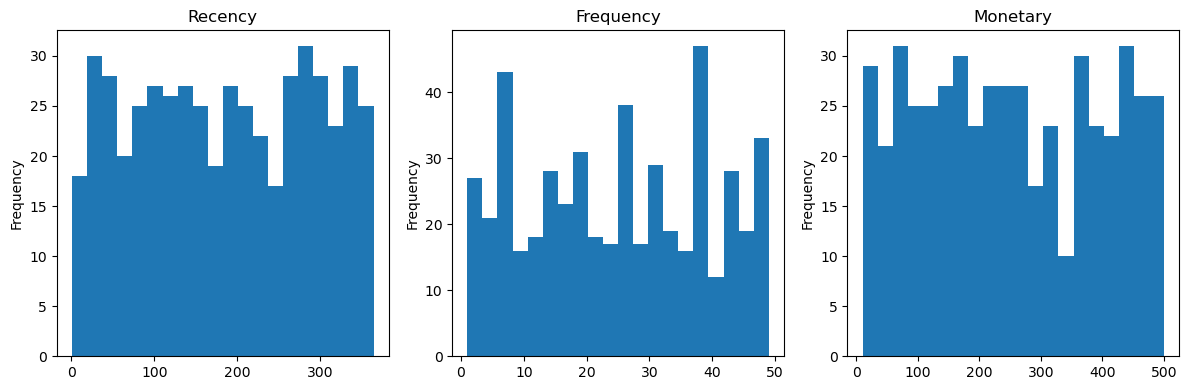

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(131)
df['Recency'].plot(kind='hist',bins=20,title='Recency')
plt.subplot(132)
df['Frequency'].plot(kind='hist',bins=20,title='Frequency')
plt.subplot(133)
df['Monetary'].plot(kind='hist',bins=20,title='Monetary')
plt.tight_layout()
plt.show()

In [8]:
kmeans=KMeans(n_clusters=4,random_state=0)

In [9]:
df['Cluster']=kmeans.fit_predict(df[['Recency','Frequency','Monetary']])

C:\Users\aarza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aarza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


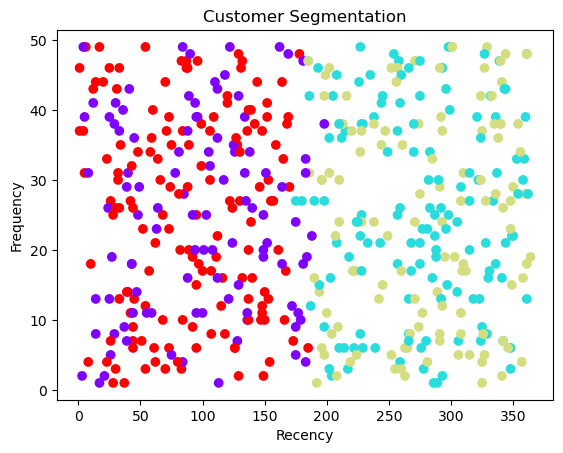

In [37]:
plt.scatter(df['Recency'],df['Frequency'],c=df['Cluster'],cmap='rainbow')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Customer Segmentation')
plt.show()

In [19]:
segments=df.groupby('Cluster').agg({
    'ID':'count',
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean'
}).reset_index()

In [20]:
segments

,Cluster,ID,Recency,Frequency,Monetary
0,0,103,96.145631,24.951456,403.425610
1,1,133,275.007519,25.248120,131.173626
2,2,117,278.205128,23.991453,380.613441
3,3,147,90.605442,25.190476,146.837225


In [28]:
for i,segment in segments.iterrows():
    print(f'Segment {segment["Cluster"]}-{segment["ID"]} Customer')
    print(f'Recency: {segment["Recency"]:.2f} Days')
    print(f'Frequency: {segment["Frequency"]:.2f} Purchase')
    print(f'Monetary: {segment["Monetary"]:.2f} on Average')
    print('-'*30)




Segment 0.0-103.0 Customer
Recency: 96.15 Days
Frequency: 24.95 Purchase
Monetary: 403.43 on Average
------------------------------
Segment 1.0-133.0 Customer
Recency: 275.01 Days
Frequency: 25.25 Purchase
Monetary: 131.17 on Average
------------------------------
Segment 2.0-117.0 Customer
Recency: 278.21 Days
Frequency: 23.99 Purchase
Monetary: 380.61 on Average
------------------------------
Segment 3.0-147.0 Customer
Recency: 90.61 Days
Frequency: 25.19 Purchase
Monetary: 146.84 on Average
------------------------------
